# Required dependencies

In [7]:
import model
from stable_baselines import PPO2

import time
from utils import make_vec_envs

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

# Defining the parameters and loading the model and environment

In [8]:
game = 'small_fair_rts'
representation = 'narrow'
model_path = 'models/{}/{}/model_1.pkl'.format(game, representation)
kwargs = {
    'change_percentage': 0.4,
    'verbose': True
}

if "small" in game:
    model.FullyConvPolicy = model.FullyConvPolicySmallMap
else:
    model.FullyConvPolicy = model.FullyConvPolicyBigMap


agent = PPO2.load(model_path)

env_name = '{}-{}-v0'.format(game, representation)
if "small" in game:
    kwargs['cropped_size'] = 8
elif "medium" in game:
    kwargs['cropped_size'] = 12
elif "large" in game:
    kwargs['cropped_size'] = 16
elif game == 'sokoban':
    kwargs['cropped_size'] = 10
    
env = make_vec_envs(env_name, representation, None, 1, **kwargs)

Loading a model without an environment, this model cannot be trained until it has a valid environment.


/Users/puyihao/.conda/envs/pcgrl/lib/python3.5/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


# Run Model

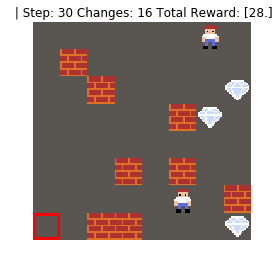

{'terminal_observation': array([[[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.]],

       [[1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.]],

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.]],

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
     

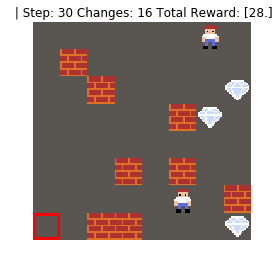

In [9]:
import time
def show_state(env, step=0, changes=0, total_reward=0, name=""):
    fig = plt.figure(10)
    plt.clf()
    plt.title("{} | Step: {} Changes: {} Total Reward: {}".format(name, step, changes, total_reward))
    plt.axis('off')
    plt.imshow(env.render(mode='rgb_array'))
    display.clear_output(wait=True)
    display.display(plt.gcf())
    
def infer(env, agent, **kwargs):
    obs = env.reset()
    dones = False
    total_rewards = 0
    while not dones:
        action, _ = agent.predict(obs)
        obs, rewards, dones, info = env.step(action)
        total_rewards += rewards
#         show_state(env, info[0]['iterations'], info[0]['changes'], total_rewards)
        if dones:
            break
        show_state(env, info[0]['iterations'], info[0]['changes'], total_rewards)
    if kwargs.get('verbose', False):
        print(info[0])
    return env, obs, info

env, obs, info = infer(env, agent, **kwargs)

In [13]:
res = [[np.argmax(item) for item in row] for row in info[0]['terminal_observation']]
for row in res:
    print(row)

[0, 0, 0, 0, 0, 0, 1, 0]
[0, 3, 0, 0, 0, 0, 0, 0]
[0, 0, 3, 0, 0, 0, 0, 2]
[0, 0, 0, 0, 0, 3, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 3, 0, 3, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 3]
[2, 0, 3, 3, 0, 0, 0, 2]


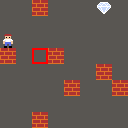

In [51]:
env.render(mode='rgb_array')